# 21_DISTRIBUCIÓN NORMAL MULTIVARIANTE

## Ingeniería de materiales

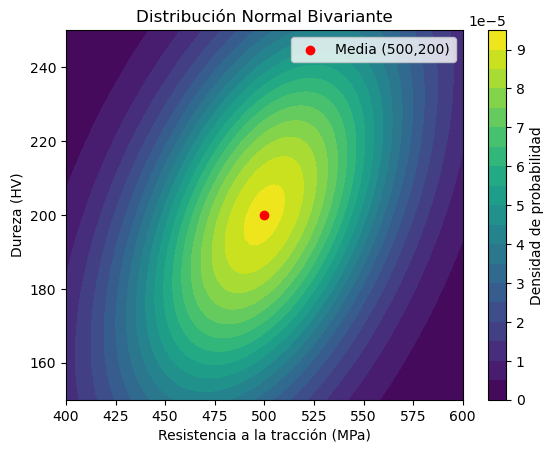

In [10]:
# Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parámetros de la distribución
mu = np.array([500, 200])
Sigma = np.array([[2500, 1000],
                  [1000, 1600]])

# Creamos el objeto distribución normal bivariante
dist = multivariate_normal(mean = mu, cov = Sigma)

# Generamos una malla de puntos para graficar
x, y = np.meshgrid(np.linspace(400, 600, 100), np.linspace(150, 250, 100))
pos = np.dstack((x,y))

# Evaluamos la pdf en la malla de puntos
pdf_values = dist.pdf(pos)

# Graficamos el mapa de contorno
plt.contourf(x, y, pdf_values, levels = 20, cmap = 'viridis')
plt.colorbar(label = 'Densidad de probabilidad')
plt.scatter(mu[0], mu[1], color = 'red', label = 'Media (500,200)')
plt.xlabel('Resistencia a la tracción (MPa)')
plt.ylabel('Dureza (HV)')
plt.title('Distribución Normal Bivariante')
plt.legend()
plt.show()

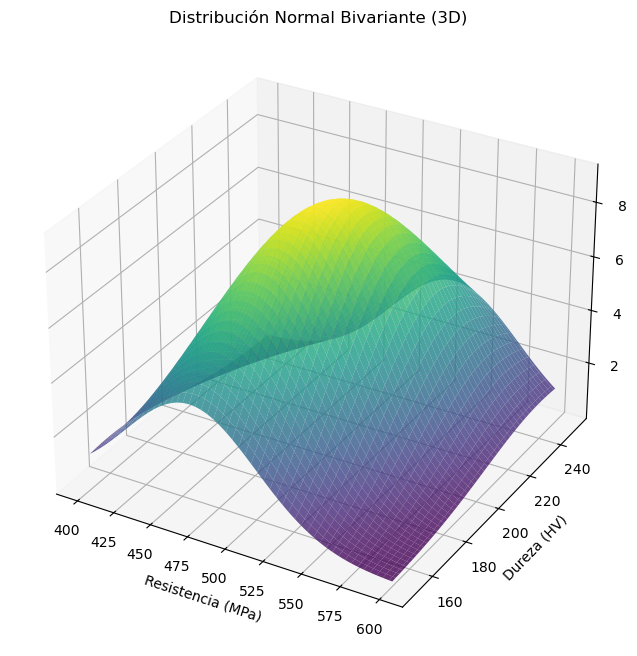

In [20]:
# Gráfica en 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, pdf_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('Resistencia (MPa)')
ax.set_ylabel('Dureza (HV)')
ax.set_zlabel('Densidad de probabilidad')
ax.set_title('Distribución Normal Bivariante (3D)')
plt.show()

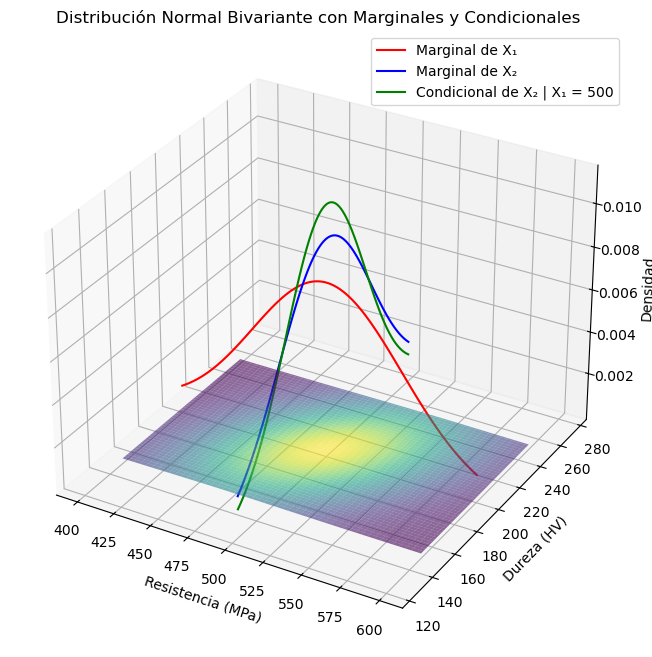

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm
from mpl_toolkits.mplot3d import Axes3D

# Parámetros de la distribución
mu = np.array([500, 200])  # Vector de medias
Sigma = np.array([[2500, 1000], [1000, 1600]])  # Matriz de covarianza

# Crear una distribución normal multivariante
dist = multivariate_normal(mean=mu, cov=Sigma)

# Generar una malla de puntos para graficar
x, y = np.meshgrid(np.linspace(400, 600, 100), np.linspace(150, 250, 100))
pos = np.dstack((x, y))

# Evaluar la PDF en la malla de puntos
pdf_values = dist.pdf(pos)

# Distribuciones marginales
x_marginal = norm(loc=mu[0], scale=np.sqrt(Sigma[0, 0]))  # Marginal de X₁
y_marginal = norm(loc=mu[1], scale=np.sqrt(Sigma[1, 1]))  # Marginal de X₂

# Distribución condicional de X₂ dado X₁ = 500
x1_cond = 500  # Valor fijo de X₁
mu_cond = mu[1] + Sigma[1, 0] / Sigma[0, 0] * (x1_cond - mu[0])  # Media condicional
sigma_cond = np.sqrt(Sigma[1, 1] - Sigma[1, 0]**2 / Sigma[0, 0])  # Varianza condicional
y_cond = norm(loc=mu_cond, scale=sigma_cond)  # Condicional de X₂ | X₁ = 500

# Gráfica en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie de la distribución bivariante
ax.plot_surface(x, y, pdf_values, cmap='viridis', alpha=0.6)

# Curva marginal de X₁ (en el plano X₁-Z)
x_vals = np.linspace(400, 600, 100)
z_marginal_x = x_marginal.pdf(x_vals)
ax.plot(x_vals, np.full_like(x_vals, mu[1]), z_marginal_x, color='red', 
        label='Marginal de X₁')

# Curva marginal de X₂ (en el plano X₂-Z)
y_vals = np.linspace(125, 275, 100)
z_marginal_y = y_marginal.pdf(y_vals)
ax.plot(np.full_like(y_vals, mu[0]), y_vals, z_marginal_y, color='blue', 
        label='Marginal de X₂')

# Curva condicional de X₂ | X₁ = 500 (en el plano X₂-Z)
y_cond_vals = np.linspace(125, 275, 100)
z_cond = y_cond.pdf(y_cond_vals)
ax.plot(np.full_like(y_cond_vals, x1_cond), y_cond_vals, z_cond, color='green', 
        label='Condicional de X₂ | X₁ = 500')

# Configuración del gráfico
ax.set_xlabel('Resistencia (MPa)')
ax.set_ylabel('Dureza (HV)')
ax.set_zlabel('Densidad')
ax.set_title('Distribución Normal Bivariante con Marginales y Condicionales')
ax.legend()
plt.show()

In [33]:
prob_x1_less_than_550 = x_marginal.cdf(550)
print(f"P(X₁ < 550) = {prob_x1_less_than_550:.4f}")

P(X₁ < 550) = 0.8413


In [34]:
prob_x2_greater_than_220 = 1 - y_marginal.cdf(220)
print(f"P(X₂ > 220) = {prob_x2_greater_than_220:.4f}")

P(X₂ > 220) = 0.3085


In [39]:
# Calcular la probabilidad conjunta
prob_joint = dist.cdf([550, 220])
print(f"P(X₁ < 550 ∩ X₂ < 220) = {prob_joint:.4f}")

P(X₁ < 550 ∩ X₂ < 220) = 0.6303


In [43]:
# Valor fijo de X₁
x1_cond = 500

# Media y varianza condicional de X₂ | X₁ = 500
mu_cond = mu[1] + Sigma[1, 0] / Sigma[0, 0] * (x1_cond - mu[0])  # Media condicional
sigma_cond = np.sqrt(Sigma[1, 1] - Sigma[1, 0]**2 / Sigma[0, 0])  # Varianza condicional

# Crear la distribución condicional
y_cond = norm(loc=mu_cond, scale=sigma_cond)

# Calcular P(X₂ > 220 | X₁ = 500)
prob_cond = 1 - y_cond.cdf(220)
print(f"P(X₂ > 220 | X₁ = 500) = {prob_cond:.4f}")

P(X₂ > 220 | X₁ = 500) = 0.2819
